In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
survival_df = pd.read_csv("../Patient-Survival-Model/Resources/cleaned_data_survival_prediction.csv")

In [39]:
survival_df.columns

Index(['hospital_id', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender',
       'height', 'icu_admit_source', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max'

In [29]:
survival_df['hospital_death'].value_counts()

0    52044
1     4891
Name: hospital_death, dtype: int64

In [40]:
X = survival_df.drop('hospital_death', axis=1)
y = survival_df['hospital_death']

In [41]:
X = pd.get_dummies(X)

In [42]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

(10, Counter({0: 39009, 1: 3692}))

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
!pip install scikit-plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from numpy import argmax
import numpy as np
def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Build and Plot PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr)
    X_pca = pca.transform(X_tr)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Build and fit the model
    if class_weight:
        model = LinearRegression(class_weight=class_weight)
    else:
        model = LinearRegression()
    model.fit(X_tr, y_tr)
    
    # Test the model
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred))
    print('Recall score %s' % recall_score(y_te, y_pred))
    print('F1-score score %s' % f1_score(y_te, y_pred))
    print('Accuracy score %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
    # Plot metrics 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print a classification report
    print(classification_report(y_te,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

In [45]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)

print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 3692, 1: 3692})
Testing target statistics: Counter({0: 13035, 1: 1199})


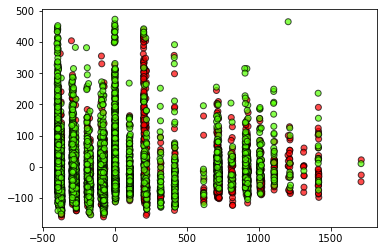

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [48]:
roc_auc_rus,fpr_rus,tpr_rus , _ = build_and_test(X_res, X_test, y_res, y_test)

In [ ]:
# from sklearn.model_selection import train_test_split
# from collections import Counter
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
# print(f"Training target statistics: {Counter(y_train)}")
# print(f"Testing target statistics: {Counter(y_test)}")

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")



Training Score: 0.2191701004944563
Testing Score: 0.21709164708500517


In [14]:
roc_auc_rus,fpr_rus,tpr_rus , _ = build_and_test(X_res, X_test, y_res, y_test)

NameError: name 'X_pca' is not defined

In [ ]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

In [ ]:
import numpy as np
# converting aSDAE list to an array
survival_df = np.array(survival_df)


In [ ]:
roc_auc_cw,fpr_cw,tpr_cw, _  = build_and_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")